# **What role does urbanization, using China as an example, play in shaping average temperature trends in a warming world?**

# Project One

## Introduction

With the development of modern cities and urbanization, the global average temperature has been increasing over the past century, leading to concerns about the impacts of climate change. While urbanization significantly improves life standards and society efficiency, it is commonly believed to be a significant contributor to the global warming process. 

China, one of the fastest-growing developing countries in the world, is undergoing rapid urbanization in the recent few decades. This research aims to examine the role of urbanization in shaping average temperature trends in China. The analysis will be focused on finding the relationship between average temperature and other independent variables such as city, years, and percentage change in annual temperature based on a time series analysis starting from 1950 to 2012. Specifically, 1950 to 1978 is the period of Chairman Mao Zedong's era, named after the founder of the Communist Party of China. Economic development was unstable and slow due to some policies that were originally aimed to achieve the goal of industrialization. The process of urbanization and modernization was slow. 
1979 to 2012 is the period China decided to begin the journey of reforming and opening up, also known as the period of the Deng Xiaoping era, named after the second leader that achieved economic recovery and development. He proposed a series of policies that aimed to accelerate the process of industrialization, including one of the most important policies in Chinese history: the Chinese reform. We will use year as independent variable to show the trend of annual temperature change between 1950 to 2012. We will also study the difference in annual average temperature using city and urban population as independent variable. We will use percentage in annual average temperature as the independent variable to see the frequency of cities that has a temperature over certain value. We will examine the relationship of percntage of urban population of the total population and average annual temperature. 

Several studies have investigated the role of urbanization in shaping average temperature trends in China. Li et al. (2013) highlighted the importance of land cover change and human activity in contributing to observed warming. Similarly, the contribution of urbanization to warming in China was found to be significant, accounting for approximately one-third of the total warming signal (Sun et al., 2016). Moreover, the magnitude of urbanization-induced warming effects was found to depend not only on a city's economic level, but also on its population scale and geographic environment (Fang et al., 2013).

By investigating the impact of urbanization on temperature trends in China, this study will further enhance our understanding of the interaction between human activity and the environment. We find out that the average temperature is increasing overall between 1978 to 2012, and remained stable between 1950 to 1978. This shows that the relationship between urbanization and economic development is positively related to the warming of China. The overall average temperature is increasing in China, with more extreme high-temperature years and less low-temperature years. 

## Data Cleaning

### Basic data cleaning

In [15]:
# Imports
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
#qeds.themes.mpl_style();

# Read dataset
df = pd.read_csv('/Users/booker/Desktop/ECO225Project/Data/GlobalLandTemperaturesByCity.csv')

In [16]:
# Check missing values
print(df.isnull().sum())

# Replacing missing values (not dropping since we will calculate the temperature change in the later section)
df['AverageTemperature'].interpolate(method='linear', inplace=True)

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64


We will first convert date to year for a easier calculation and groupby in the following steps.

In [17]:
# Convert all dates
df['Date'] = pd.to_datetime(df.dt)
df.drop(columns = ['dt'], axis = 1, inplace = True)
df['Year'] = df['Date'].dt.year

### Line Plots data cleaning
Group by China and year to get national average temperature, and the filter the year into three periods to create three datasets used to plot the line plots.

In [18]:
# Group by China and year to get national average temperature
df_china = df[df['Country'] == 'China']
grouped_na = df_china.groupby('Year').mean().reset_index()
grouped_na

,Year,AverageTemperature,AverageTemperatureUncertainty
0,1816,12.992386,2.482814
1,1817,11.812655,2.168143
2,1818,12.491821,2.487060
3,1819,11.834655,2.122083
4,1820,7.468623,1.985787
...,...,...,...
193,2009,13.733718,0.301493
194,2010,13.430684,0.309203
195,2011,13.316098,0.334082
196,2012,13.204191,0.493267


In [19]:
# Filter the data to form 3 datasets ranging from different years
grouped_na_1 = grouped_na[(grouped_na['Year'] >= 1950) & (grouped_na['Year'] <= 1978)]
grouped_na_2 = grouped_na[(grouped_na['Year'] >= 1979) & (grouped_na['Year'] <= 2012)]
grouped_na_3 = grouped_na[(grouped_na['Year'] >= 1950) & (grouped_na['Year'] <= 2012)]

### Bar Charts data cleaning
We first group data by city and year, and then find the top 10 cities with the largest and lowest temperature increased from 1950 to 2012. Then we use bar charts to plot the data.

In [20]:
# Select data from 1950 to 2012
grouped_time = df_china[(df_china['Year'] >= 1950) & (df_china['Year'] <= 2012)]

# Group by City and Year to find the annual average temperature for each city
grouped_citi = grouped_time.groupby(['City', 'Year'])['AverageTemperature'].mean().reset_index()
grouped_citi

,City,Year,AverageTemperature
0,Acheng,1950,2.278167
1,Acheng,1951,2.380917
2,Acheng,1952,1.605833
3,Acheng,1953,1.878250
4,Acheng,1954,1.833333
...,...,...,...
23368,Ürümqi,2008,7.851250
23369,Ürümqi,2009,7.287417
23370,Ürümqi,2010,6.650083
23371,Ürümqi,2011,6.806083


In [21]:
# Find the top 10 cities with the largest temperature increased from 1950 to 2012
grouped_citi.set_index(['City', 'Year'], inplace=True)

# Write the function that compute the percentage temperature change
def difference(df, first, last, column_name):
    for row in df.iterrows():
        index_value, columns_value = row
        start = df.loc[index_value[0], first]['AverageTemperature']
        end = df.loc[index_value[0], last]['AverageTemperature']
        cleaneddata = float((start - end)/end * 100)
        df.at[index_value, column_name] = cleaneddata
        
# Apply the function to compute the outcome
difference(grouped_citi, 2012, 1950, 'TemperaturePctChange')

In [22]:
# Find the top 10 cities with the largest temperature increased from 1950 to 2012
largest_city = grouped_citi.sort_values(by='TemperaturePctChange', ascending=False)
top_cities = largest_city.reset_index().drop_duplicates(subset='City')
top_cities.set_index('Year', inplace=True)
top_cities_1950 = top_cities.loc[1950].head(10)
top_cities_1950

,City,AverageTemperature,TemperaturePctChange
Year,,,
1950,Yakeshi,-1.619333,46.294772
1950,Shuangyashan,2.037833,36.967367
1950,Xining,2.497417,14.248056
1950,Qitaihe,3.010333,13.484110
1950,Didao,3.010333,13.484110
1950,Lianran,14.700083,5.242034
1950,Xianyang,11.395167,4.414152
1950,Xuchang,13.791750,4.322632
1950,Xingtai,11.706667,3.638952


In [23]:
# Find the top 10 cities with the lowest temperature increased from 1950 to 2012
lowest_city = grouped_citi.sort_values(by='TemperaturePctChange', ascending=True)
low_cities = lowest_city.reset_index().drop_duplicates(subset='City')
low_cities.set_index('Year', inplace=True)
low_cities_1950 = low_cities.loc[1950].head(10)
low_cities_1950

,City,AverageTemperature,TemperaturePctChange
Year,,,
1950,Dunhua,3.058000,-4.608132
1950,Yanji,3.058000,-4.608132
1950,Badaojiang,3.976250,-4.327780
1950,Gongzhuling,5.397167,-3.245530
1950,Ranghulu,3.322917,-3.134796
1950,Leiyang,17.465833,-2.219572
1950,Hengyang,17.465833,-2.219572
1950,Guilin,19.041083,-2.073149
1950,Kaili,15.173750,-1.754126


### Pivot table 
Create a pivot table to plot scatter plots for the top 4 cities with the largest and lowest temperature increased from 1950 to 2012. In addition, we can use bar charts to show the trend of the number of cities that exceeds 23 degrees and below 0 degrees under a 5 years interval.

In [24]:
# Create a pivot table
city_pivot = grouped_citi.pivot_table(values='AverageTemperature', index='Year', columns='City')
city_pivot

City,Acheng,Aksu,Altay,Anbu,Anda,Ankang,Anqing,Anqiu,Anshan,Anshun,...,Zhucheng,Zhuhai,Zhuji,Zhumadian,Zhuozhou,Zhuzhou,Zigong,Zouxian,Zunyi,Ürümqi
Year,,,,,,,,,,,,,,,,,,,,,
1950,2.278167,9.318167,-0.995500,21.786750,4.079083,12.152917,15.907833,12.629583,7.562750,14.079667,...,12.629583,22.817500,16.241667,14.782083,11.903917,17.212250,17.403417,13.330167,14.548000,5.525333
1951,2.380917,9.732917,-0.021083,21.551583,4.090750,12.288417,15.818417,12.539417,7.471250,14.347750,...,12.539417,22.423583,16.292333,14.830250,12.020750,17.157167,17.788417,13.337500,14.963250,6.118250
1952,1.605833,9.559083,-1.072667,22.087833,3.308083,12.259083,15.522583,12.166667,7.074333,14.828750,...,12.166667,23.100000,16.226917,14.700083,11.714333,17.059667,17.871167,13.015500,15.179667,4.940750
1953,1.878250,10.244583,0.501500,22.031583,3.565667,12.844250,16.513667,12.842000,7.077250,14.615917,...,12.842000,22.864167,16.809167,15.609500,11.955333,17.467833,18.087000,13.691750,15.138417,6.401250
1954,1.833333,8.868000,-1.304417,21.897000,3.463417,12.023333,15.219833,11.859583,7.101333,14.071583,...,11.859583,22.811000,15.926750,14.069000,11.335083,16.764000,17.361583,12.718500,14.469000,4.485667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,4.137167,10.947167,1.910750,21.769083,5.843333,12.822500,16.315583,13.072500,8.824583,14.099833,...,13.072500,22.589167,16.820500,15.420333,13.124000,17.770750,17.897417,13.976000,14.930083,7.851250
2009,2.533333,11.262667,1.096583,22.193500,4.319500,13.080250,16.523833,13.266667,8.266417,14.946417,...,13.266667,23.073083,17.059333,15.519333,12.967750,17.984250,18.358000,14.201333,15.502333,7.287417
2010,2.337083,10.965667,0.060417,21.837417,3.852250,13.039083,16.440250,12.744333,7.586250,14.796333,...,12.744333,22.895083,16.690000,15.606833,12.249500,17.676083,18.007917,13.766333,15.146250,6.650083


In [25]:
# Create a column that calculates the annual percentage change from 1950 to 2012
mean_pivot = city_pivot.reset_index()
mean_pivot["mean_temp_change"] = mean_pivot.mean(axis=1)

# Filter the data from 1950 to 1978
mean_pivot_before = mean_pivot[mean_pivot['Year'] >= 1950]
mean_pivot_before = mean_pivot_before[mean_pivot_before['Year'] <= 1978]

# Filter the data from 1979 to 2012
mean_pivot_after = mean_pivot[mean_pivot['Year'] >= 1979]
mean_pivot_after = mean_pivot_after[mean_pivot_after['Year'] <= 2012]

## Summary Statistics Tables

### Table 1: Average temperature from 1950 to 1978
In this table, we can see that the average temperature from 1950 to 1978 is around 12.94 degrees, with a standard deviation of 0.32 degrees. The maximum temperature is 13.54 degrees, and the minimum temperature is 12.27 degrees. We can then compare the average temperature, maximum and minimum temperature of the temperature from 1979 to 2012 to see if there's a warming China.

In [26]:
# Describing the average temperature and average temperature uncertainty from 1950 to 1978
grouped_na_1.describe()

,Year,AverageTemperature,AverageTemperatureUncertainty
count,29.000000,29.000000,29.000000
mean,1964.000000,12.942087,0.342187
std,8.514693,0.319699,0.053785
min,1950.000000,12.270832,0.278007
25%,1957.000000,12.783733,0.310153
50%,1964.000000,12.979855,0.325047
75%,1971.000000,13.183739,0.353979
max,1978.000000,13.544514,0.493532


### Table 2: Average temperature from 1950 to 1978
In this table, we can see that the average temperature from 1979 to 2012 is around 13.42 degrees, with a standard deviation of 0.42 degrees. The maximum temperature is 14.26 degrees, and the minimum temperature is 12.50 degrees. All of the indicators suggest that there is a increasing temperature trend compared to the period of 1950 to 1978. It provides us some insights of the big picture before we plot our graphs.

In [27]:
# Describing the average temperature and average temperature uncertainty from 1979 to 2012
grouped_na_2.describe()

,Year,AverageTemperature,AverageTemperatureUncertainty
count,34.000000,34.000000,34.000000
mean,1995.500000,13.415004,0.298044
std,9.958246,0.421474,0.037514
min,1979.000000,12.499564,0.262996
25%,1987.250000,13.183835,0.283851
50%,1995.500000,13.391446,0.289897
75%,2003.750000,13.722694,0.301469
max,2012.000000,14.267247,0.493267


### Table 3: Average temperature from 1950 to 2012
In this table, we can see that the average temperature from 1950 to 2012 is around 13.20 degrees, with a standard deviation of 0.44 degrees. The maximum temperature is 14.26 degrees, and the minimum temperature is 12.27 degrees.

In [28]:
# Describing the average temperature and average temperature uncertainty from 1950 to 2012
grouped_na_3.describe()

,Year,AverageTemperature,AverageTemperatureUncertainty
count,63.000000,63.000000,63.000000
mean,1981.000000,13.197312,0.318364
std,18.330303,0.444033,0.050471
min,1950.000000,12.270832,0.262996
25%,1965.500000,12.968142,0.288589
50%,1981.000000,13.187257,0.302814
75%,1996.500000,13.424886,0.327684
max,2012.000000,14.267247,0.493532


### Table 4: Top 10 cities with the largest percent change in average temperature
We can see the top 10 cities with the largest percent change in average temperature from 1950 to 2012. The maximum annual temperature is 14.70 degrees among those 10 cities, while the lowest annual temperature is -1.62 degrees, with a very high standard deviation of 5.98 degrees. The city with the maximum percent change in annual temperature is 46.29%, showing that there is a huge variation in temperature for that city. It can be the result from global warming and urbanization. 

In [29]:
top_cities_1950.describe()

,AverageTemperature,TemperaturePctChange
count,10.000000,10.000000
mean,7.243417,14.536332
std,5.975593,15.103190
min,-1.619333,3.267132
25%,2.625646,4.345512
50%,7.202750,9.363072
75%,11.854604,14.057070
max,14.700083,46.294772


### Table 5: Top 10 cities with the lowest percent change in average temperature
We can see the top 10 cities with the lowest percent change in average temperature from 1950 to 2012. The city with the minimum percent change in annual temperature is -4.61%, showing that there is a decrease in temperature for that city. We can also compare the previous graph and conclude that cities are becoming warmer.

In [30]:
low_cities_1950.describe()

,AverageTemperature,TemperaturePctChange
count,10.000000,10.000000
mean,9.972467,-2.972277
std,6.843769,1.192123
min,3.058000,-4.608132
25%,3.486250,-4.057217
50%,8.581500,-2.677184
75%,16.892812,-2.109755
max,19.041083,-1.531978


## Plots, Histograms, Figures

### Line Plots

In this section, we will first use line plots to demonstrate how the average temperature changed from 1950 to 2013 nationally. 

Specifically, we will divide the time interval into two periods: 1950 to 1978 and 1979 to 2012. The first period is the founding of the People's Republic of China, whereas the second period is China decided to begin the journey of reforming and opening up. The second period represents the urbanization and fast economic development of China. We will also see the overall picture from 1950 to 2012.

From the first graph, titled 'Average Temperature Trend from 1950 to 1978', we can see that the average temperature trend in China is relatively steady and is moving around at 13.0 degrees. This is the period of Chairman Mao Zedong's era, named after the founder of the Communist Party of China. Economic development was unstable and slow due to some policies that were originally aimed to achieve the goal of industrialization. The process of urbanization and modernization was slow. 

From the second graph, 'Average Temperature Trend from 1979 to 2012', we can see that the average temperature trend in China is increasing. This is the period of the Deng Xiaoping era, named after the second leader that achieved economic recovery and development. He proposed a series of policies that aimed to accelerate the process of industrialization, including one of the most important policies in Chinese history: the Chinese reform. 

From the third graph, 'Average Temperature Trend from 1950 to 2012', we can see that the average temperature trend in China is increasing. This graph provides us with a clear image of how the average temperature change in China from 1950 to 2012. The temperature is positively correlated with the development of China, including economic development and urbanization. 

In [31]:
# Write function that can generate line plots
def plot_lineplot(dataset, title):
    plt.figure(figsize=(20, 5))
    plt.plot(dataset['Year'], dataset['AverageTemperature'], label='National Average')
    plt.xlabel('Year')
    plt.ylabel('Average Temperature')
    plt.title(title)
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

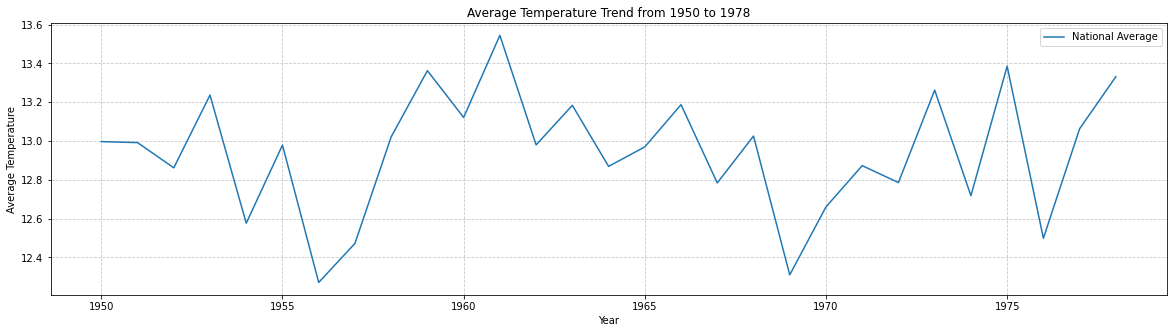

In [32]:
# Plot the graphs
plot_lineplot(grouped_na_1, 'Average Temperature Trend from 1950 to 1978')

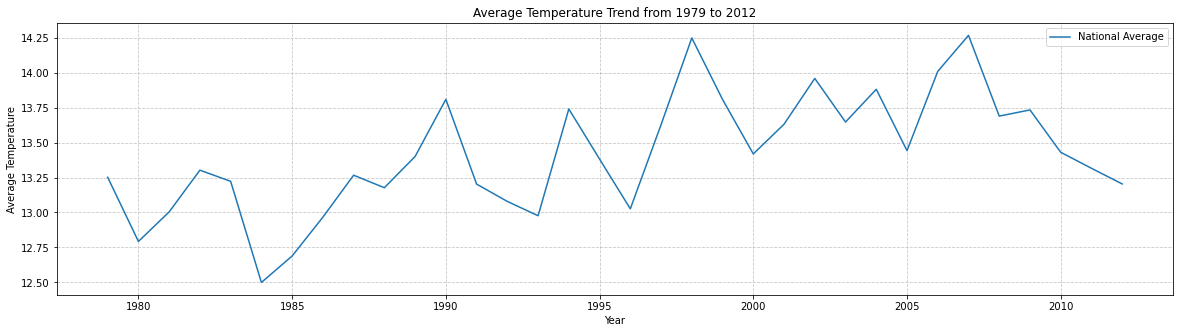

In [33]:
plot_lineplot(grouped_na_2, 'Average Temperature Trend from 1979 to 2012')

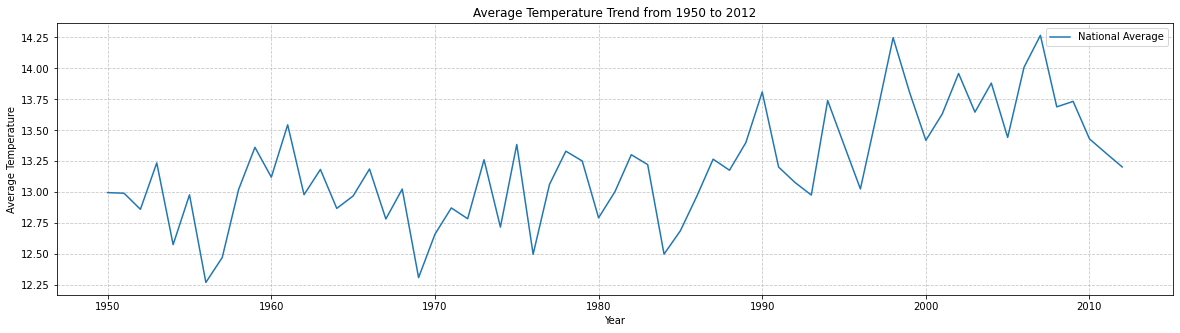

In [34]:
plot_lineplot(grouped_na_3, 'Average Temperature Trend from 1950 to 2012')

### Bar charts
In this section, we will use bar charts to show the top 10 cities with the largest and lowest average temperature percent changes from 1950 to 2012. These charts will provide insights into how different regions in China have been affected by temperature changes over time.

Looking at the bar chart for the top 10 cities with the largest temperature percent changes, we can see that cities such as Yakeshi and Shuangyashan experienced an increase of over 35 percent in annual temperature from 1950 to 2012. In contrast, most other cities experienced an average temperature increase of around 10 percent. These findings indicate that many cities in China are becoming warmer, and some regions are experiencing more significant temperature changes than others.

The bar chart for the top 10 cities with the lowest temperature percent changes reveals that cities such as Dunhua and Yanji experienced the lowest percentage change in temperature, but only up to around -4.5%. This suggests that some regions in China may not have experienced significant temperature changes or may have even experienced a decrease in temperature.

Overall, these bar charts highlight the different temperature trends observed in various regions of China from 1950 to 2012. They provide further evidence that urbanization and economic development have led to an increase in temperature in many cities in China.

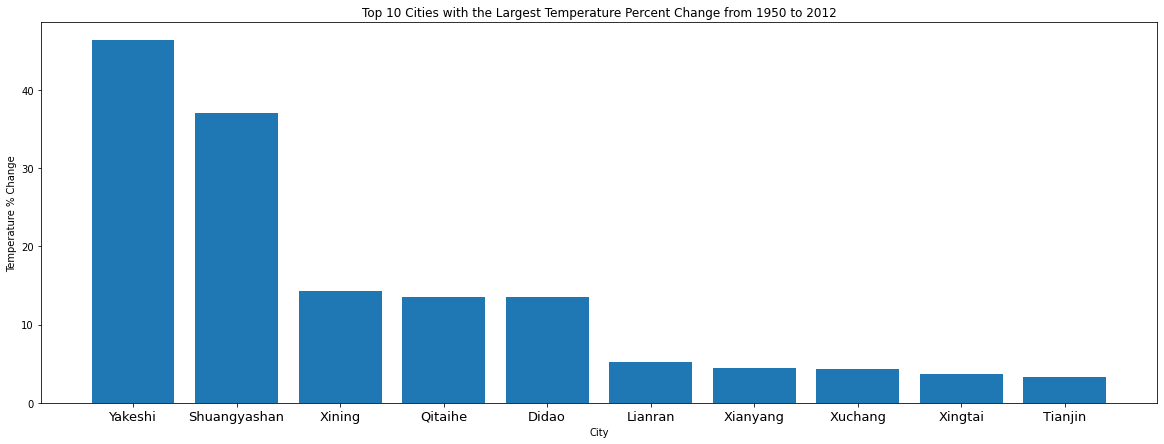

In [35]:
# Plot the graph of largest temperature change between 1950 to 2012
plt.figure(figsize=(20, 7))
plt.bar(top_cities_1950['City'], top_cities_1950['TemperaturePctChange'])
plt.xlabel('City')
plt.ylabel('Temperature % Change')
plt.title('Top 10 Cities with the Largest Temperature Percent Change from 1950 to 2012')
plt.tick_params(axis='x', labelsize=13)
plt.show()

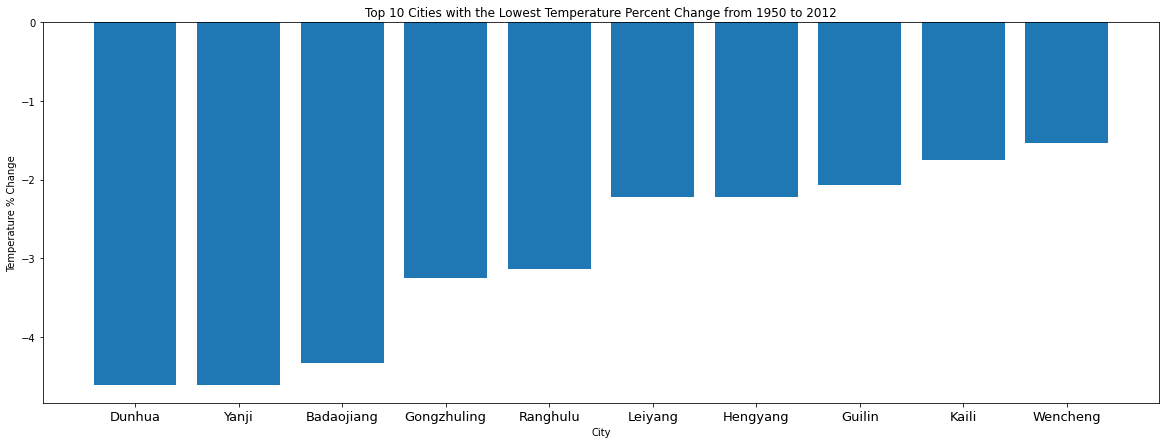

In [36]:
# Plot the graph of lowest temperature change between 1950 to 2012
plt.figure(figsize=(20, 7))
plt.bar(low_cities_1950['City'], low_cities_1950['TemperaturePctChange'])
plt.xlabel('City')
plt.ylabel('Temperature % Change')
plt.title('Top 10 Cities with the Lowest Temperature Percent Change from 1950 to 2012')
plt.tick_params(axis='x', labelsize=13)
plt.show()

The graphs below illustrate the trend of the number of cities with annual temperatures exceeding 23 degrees and below 0 degrees, over a 5-year interval from 1950 to 2010.

The first graph indicates an upward trend, which suggests that the number of cities with an annual temperature of 23 degrees or higher has increased steadily over time. This trend is particularly prominent after 1980, coinciding with China's urbanization and economic growth. The graph provides further evidence that rapid urbanization has contributed to the accelerated increase in temperature.

The second graph shows a decreasing trend, which implies that fewer cities have an annual temperature of 0 degrees or lower. This suggests that all cities in China are experiencing warming temperatures, rather than cooling. Once again, the graph highlights the impact of urbanization and economic growth on temperature changes in China, as cities become increasingly hotter.

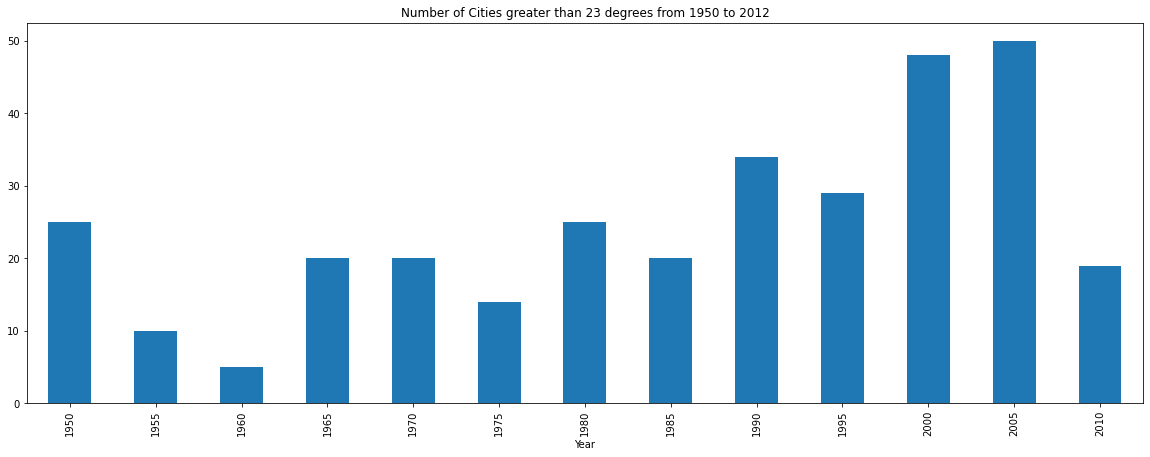

In [37]:
# Count the number of cities that is greater than 23 degrees
filt_temp = city_pivot[city_pivot > 23]
filt_count = filt_temp.count(axis=1)
grouped_count = filt_count.groupby(lambda x: x // 5 * 5).sum()
plt.figure(figsize=(20,7))
grouped_count.plot(kind='bar')
plt.title('Number of Cities greater than 23 degrees from 1950 to 2012')

plt.show()

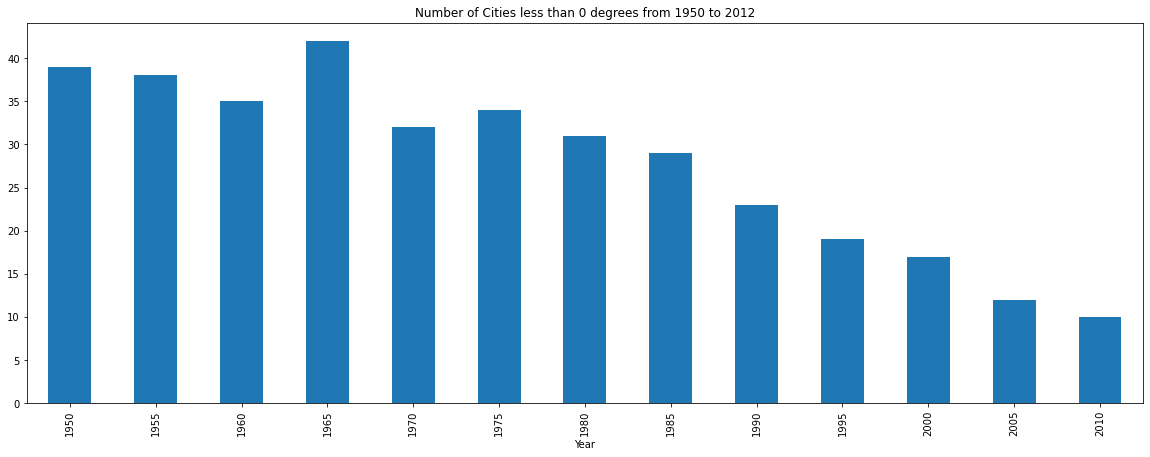

In [38]:
# Count the number of cities that is lower than 0 degrees
filt_temp = city_pivot[city_pivot < 0]
filt_count = filt_temp.count(axis=1)
grouped_count = filt_count.groupby(lambda x: x // 5 * 5).sum()
plt.figure(figsize=(20,7))
grouped_count.plot(kind='bar')
plt.title('Number of Cities less than 0 degrees from 1950 to 2012')

plt.show()

### Scatter Plots
We now focus on examining the cities with the largest percentage change in average temperature. The following four graphs display the top four cities with the highest percentage change in average temperature. We observe a strong positive relationship between time and annual temperature change for each of these cities. This is consistent with the overall trend in China, where the average annual temperature has been increasing from 1950 to 2012. However, these graphs provide a more detailed picture of how the annual temperature has changed over time for each of these representative cities.

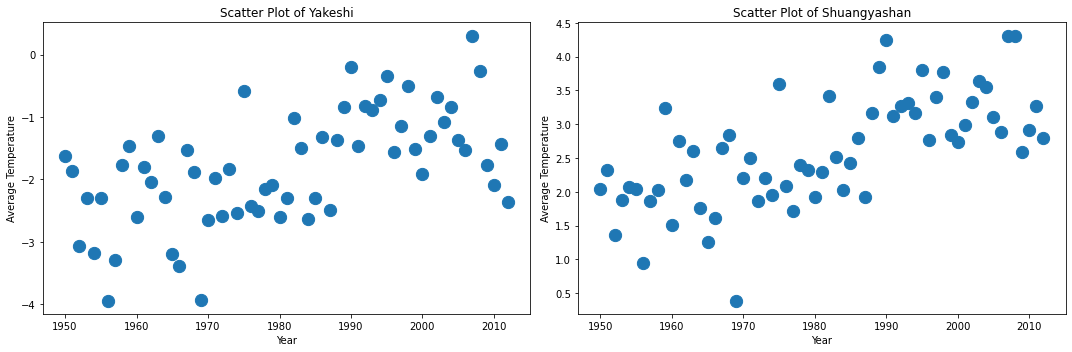

In [39]:
# Write a function to plot scatter plots
dff = city_pivot.reset_index()
def plot_scatter(city, title, ax):
    dff.plot(x='Year', y=city, kind='scatter', s=150, figsize=(15, 5), ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Temperature')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_scatter('Yakeshi', 'Scatter Plot of Yakeshi', ax[0])
plot_scatter('Shuangyashan', 'Scatter Plot of Shuangyashan', ax[1])

plt.tight_layout()

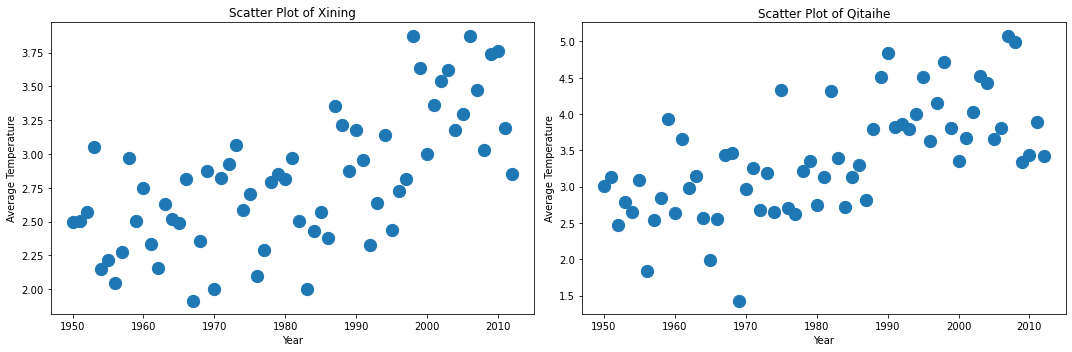

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_scatter('Xining', 'Scatter Plot of Xining', ax[0])
plot_scatter('Qitaihe', 'Scatter Plot of Qitaihe', ax[1])
plt.tight_layout()

### Histogram
We presented a histogram displaying the percentage change in annual temperature from 1950 to 2012 across multiple cities. Our analysis indicates that the majority of cities experienced a positive temperature change, with most cities having a percentage change of around 18.5. The overall shape of the histogram closely approximates a normal distribution.

Interestingly, we found that from 1950 to 1978, when economic development in China was slow and most areas were rural, most cities had an annual percentage change in temperature of 18.1. However, from 1979 to 2012, during a period of rapid economic development and urbanization, most cities had an annual percentage change in temperature ranging from 18.25 to 19.00. This indicates that temperatures have increased in China over the past few decades, with evidence pointing to urbanization as a significant factor in this trend.

While urbanization has brought benefits to humanity in terms of improved living standards and quality of life, it has also led to global warming. The observed increase in temperatures highlights the cost of urbanization and emphasizes the importance of implementing sustainable urban development strategies that mitigate the impact of global warming.

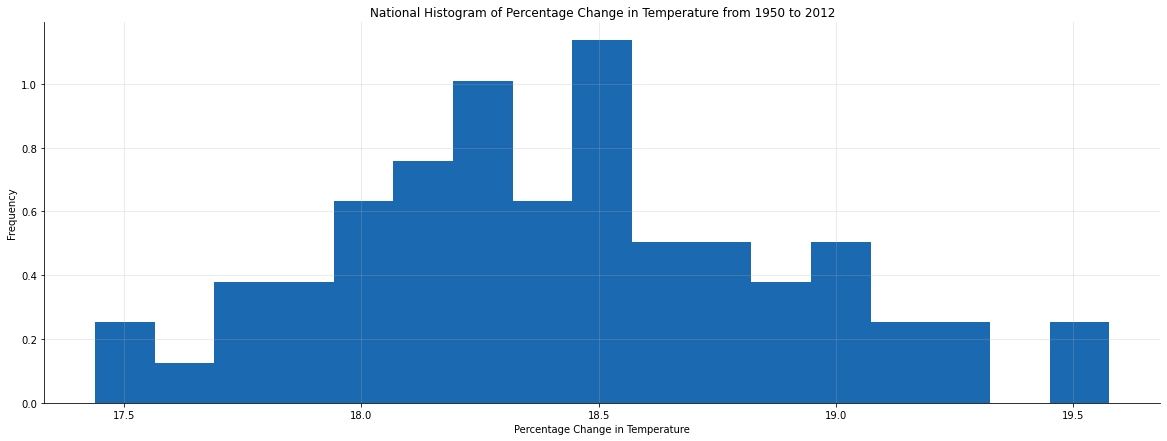

In [41]:
fig, ax = plt.subplots(figsize=(20, 7))
mean_pivot.plot(
    kind="hist", y="mean_temp_change", color="#1a69b1",
    bins=17, legend=False, density=True, ax=ax
)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Percentage Change in Temperature")
ax.set_ylabel("Frequency")
ax.set_title("National Histogram of Percentage Change in Temperature from 1950 to 2012")
ax.grid(True, alpha=0.3)

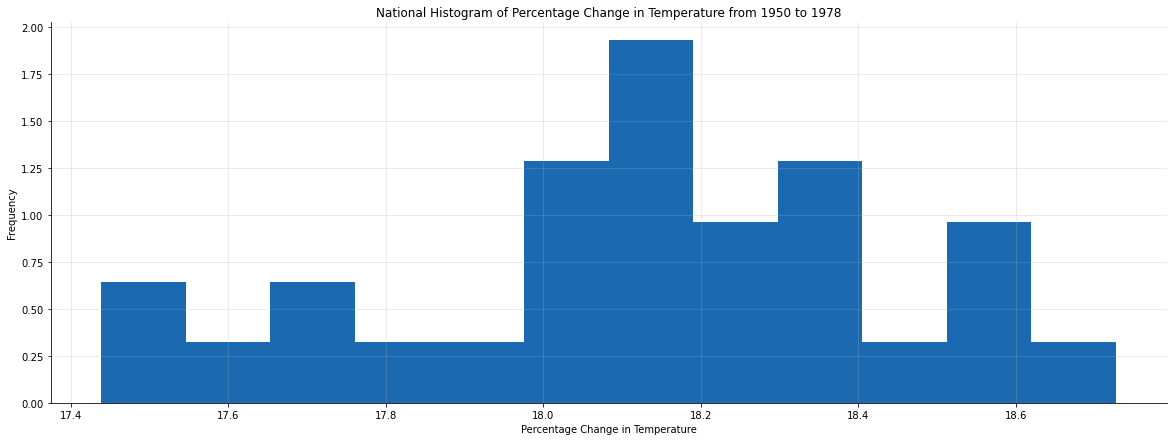

In [42]:
fig, ax = plt.subplots(figsize=(20, 7))
mean_pivot_before.plot(
    kind="hist", y="mean_temp_change", color="#1a69b1",
    bins=12, legend=False, density=True, ax=ax
)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Percentage Change in Temperature")
ax.set_ylabel("Frequency")
ax.set_title("National Histogram of Percentage Change in Temperature from 1950 to 1978")
ax.grid(True, alpha=0.3)

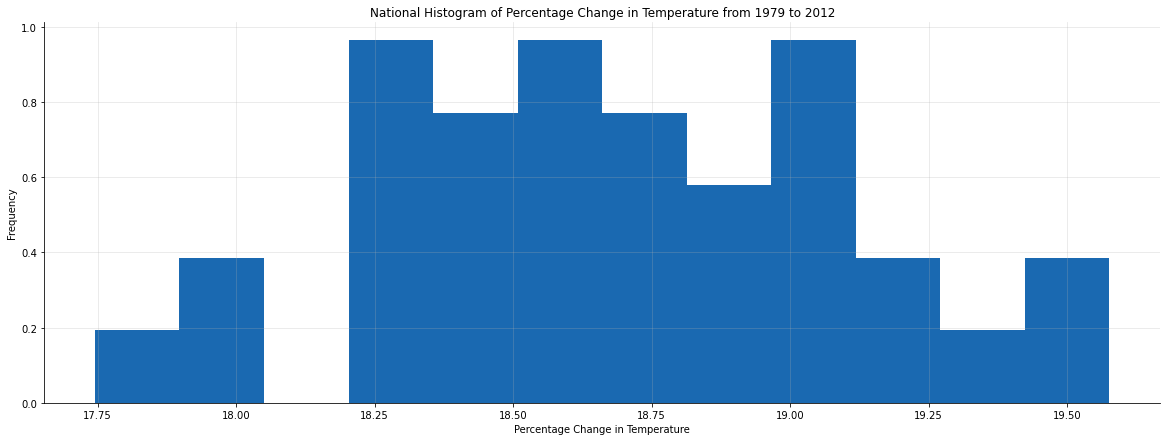

In [43]:
fig, ax = plt.subplots(figsize=(20, 7))
mean_pivot_after.plot(
    kind="hist", y="mean_temp_change", color="#1a69b1",
    bins=12, legend=False, density=True, ax=ax
)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Percentage Change in Temperature")
ax.set_ylabel("Frequency")
ax.set_title("National Histogram of Percentage Change in Temperature from 1979 to 2012")
ax.grid(True, alpha=0.3)

# Project Two

## The Message
In our previous project, we created line plots, bar charts, scatter plots, and histograms for China's average temperature data from 1950 to 2012. We found a correlation between urbanization and temperature increase. To expand on our findings, we will merge a new dataset that includes China's population data. This dataset will help us analyze the urbanization trend in China, as population growth is a significant driver of urbanization.

Unfortunately, our analysis is hindered by missing data for both urban and rural population in China from 1950 to 1959. Simply using a linear regression between years after 1959 and urban or rural population will not work, as it will overpredict the population for 1950 to 1959. An alternative approach would be to use a time series prediction model like the exponential smoothing model, which I learned in ECO374: Forecasting and Time Series Econometrics. However, applying this model requires a deep understanding and strong application skills that I have not yet acquired.

Therefore, we propose a simpler solution: to use the data of urban and rural population percentage of the total population for 1960 to fill in the missing values from 1950 to 1959. Since the variation in urban and rural population during this time is negligible, we can ignore the changes in population given the broader time range from 1950 to 2012. Furthermore, this period of time (1950-1978) is characterized by slow economic growth and urbanization in China, making it a suitable candidate for this approach. By filling in the missing values with the data from 1960, we can continue our analysis and explore the relationship between urbanization and temperature increase in China.

### Data cleaning

In [258]:
# Read the dataset and set index as year
popu = pd.read_csv('/Users/booker/Desktop/ECO225Project/Data/China population.csv', index_col='Year')

# Replace the commas in the Urban Population and Rural Population columns
popu['Urban Population'] = popu['Urban Population'].str.replace(',', '')
popu['Rural Population'] = popu['Rural Population'].str.replace(',', '')
popu['Population'] = popu['Population'].str.replace(',', '')

# Replace 'Null' with NaN
popu = popu.replace('Null', np.nan)
popu.fillna(method='ffill', inplace=True)

In [259]:
# Replace NaN using percentage of the total population for 1960
for year in range(1950, 1960):
    popu.loc[year, 'Urban Population'] = int(popu.loc[year, 'Population']) * 0.16
    popu.loc[year, 'Rural Population'] = int(popu.loc[year, 'Population']) * 0.74
    popu.loc[year, 'Urban Population % of Total Population'] = 16.0
    popu.loc[year, 'Rural Population % of Total Population'] = 74.0
    
# Reset index for merge
popu.reset_index(inplace=True)

In [286]:
# Filter grouped_na to only include years from 1950 to 1978
popu_1 = popu[(popu['Year'] >= 1950) & (popu['Year'] <= 1978)]

# Merge the datasets
merged_data_1 = pd.merge(grouped_na_1, popu_1[['Year', 'Urban Population', 'Urban Population % of Total Population', 'Rural Population', 'Rural Population % of Total Population']], on='Year', how='left')

# Filter grouped_na to only include years from 1979 to 2012
popu_2 = popu[(popu['Year'] >= 1979) & (popu['Year'] <= 2012)]

# Merge the datasets
merged_data_2 = pd.merge(grouped_na_2, popu_2[['Year', 'Urban Population', 'Urban Population % of Total Population', 'Rural Population', 'Rural Population % of Total Population']], on='Year', how='left')

# Filter grouped_na to only include years from 1950 to 2012
popu_3 = popu[(popu['Year'] >= 1950) & (popu['Year'] <= 2012)]

# Merge the datasets
merged_data_3 = pd.merge(grouped_na_3, popu_3[['Year', 'Urban Population', 'Urban Population % of Total Population', 'Rural Population', 'Rural Population % of Total Population']], on='Year', how='left')

In [329]:
merged_data_1['Urban Population'] = merged_data_1['Urban Population'].astype(float)
merged_data_1['Rural Population'] = merged_data_1['Rural Population'].astype(float)
merged_data_2['Urban Population'] = merged_data_2['Urban Population'].astype(float)
merged_data_2['Rural Population'] = merged_data_2['Rural Population'].astype(float)
merged_data_3['Urban Population'] = merged_data_3['Urban Population'].astype(float)
merged_data_3['Rural Population'] = merged_data_3['Rural Population'].astype(float)

### Scatter Plots

The scatter plots reveal a significant change in the relationship between urban population and average temperature in China from 1950 to 2012. The first scatter plot (1950-1978) shows no correlation between urban population and average temperature, indicating that during this time when urbanization was slow, the average annual temperature remained relatively stable.

Conversely, the second scatter plot (1978-2012) shows a positive correlation between urban population and average temperature, suggesting that as urbanization accelerated, the average temperature also increased.

Finally, when we examine the bigger picture, we have discovered that there is a positive correlation between urban population and average temperature during the period from 1950 to 2012. This means that as the urban population increases, the average temperature also tends to increase. This answers the research question in general and suggests that urbanization plays a important role in shaping China as a warming country.

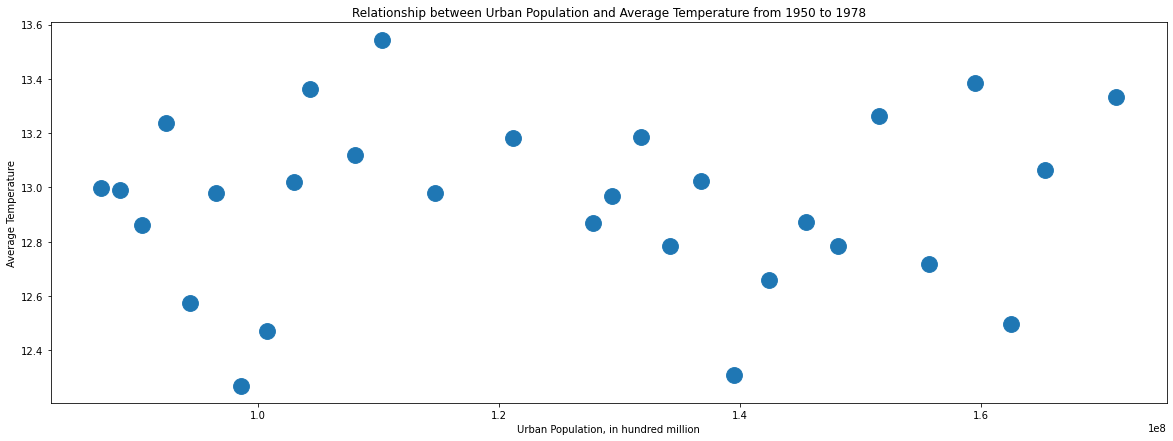

In [323]:
plt.figure(figsize=(20, 7))
plt.scatter(merged_data_1['Urban Population'], merged_data_1['AverageTemperature'], s=250)
plt.xlabel('Urban Population, in hundred million')
plt.ylabel('Average Temperature')
plt.title('Relationship between Urban Population and Average Temperature from 1950 to 1978')
plt.show()

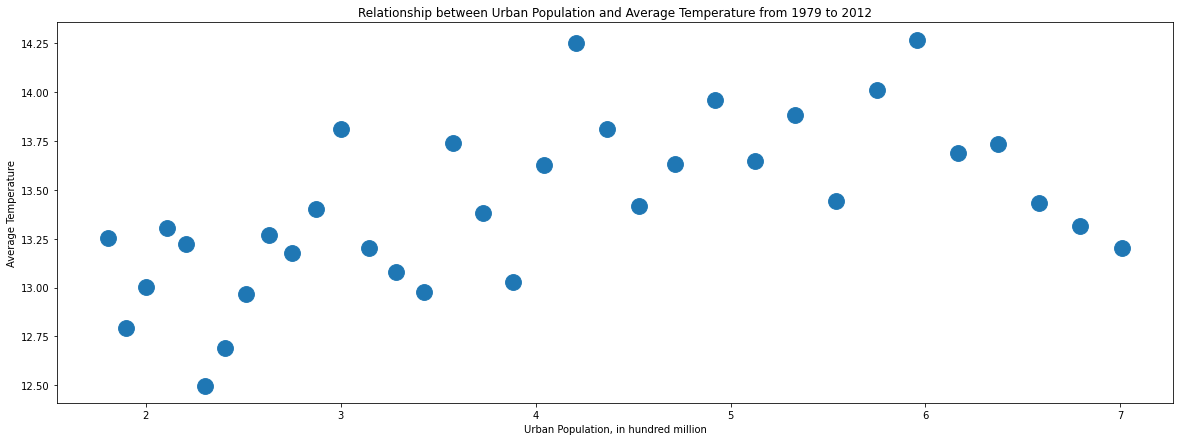

In [324]:
plt.figure(figsize=(20, 7))
plt.scatter(merged_data_2['Urban Population'], merged_data_2['AverageTemperature'], s=250)
plt.xlabel('Urban Population, in hundred million')
plt.ylabel('Average Temperature')
plt.title('Relationship between Urban Population and Average Temperature from 1979 to 2012')
plt.show()

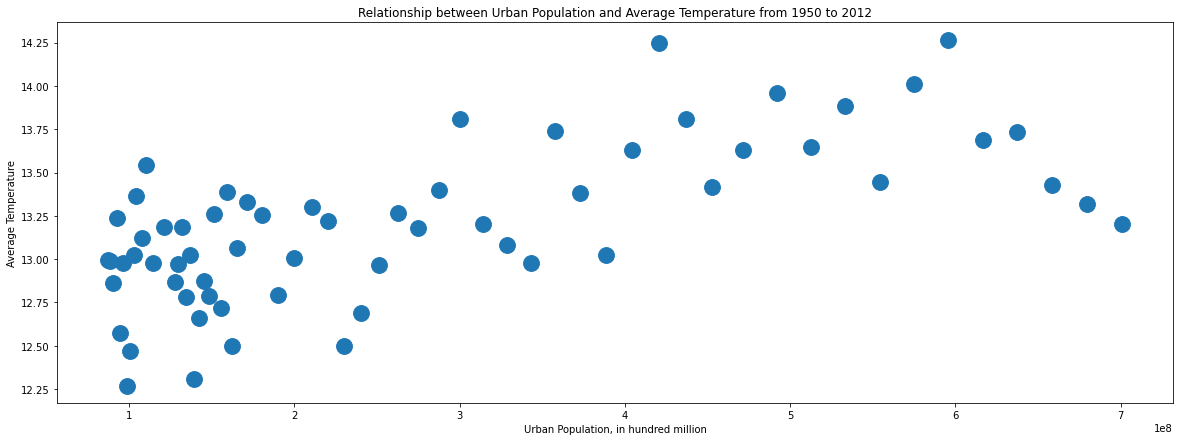

In [325]:
plt.figure(figsize=(20, 7))
plt.scatter(merged_data_3['Urban Population'], merged_data_3['AverageTemperature'], s=250)
plt.xlabel('Urban Population, in hundred million')
plt.ylabel('Average Temperature')
plt.title('Relationship between Urban Population and Average Temperature from 1950 to 2012')
plt.show()

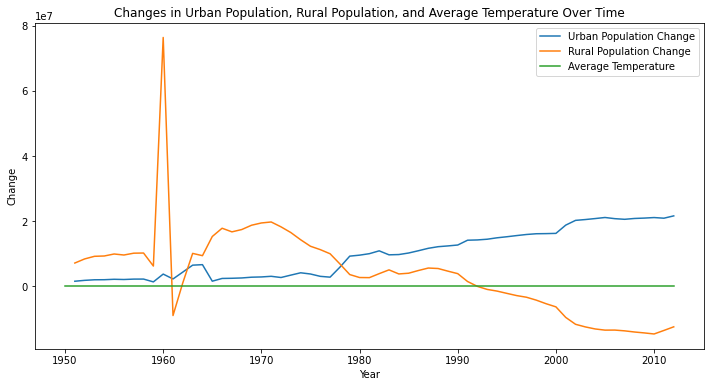

In [331]:
# Calculate the changes in urban and rural population
merged_data_3["Urban Population Change"] = merged_data_3["Urban Population"].diff()
merged_data_3["Rural Population Change"] = merged_data_3["Rural Population"].diff()

# Create a line graph
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(merged_data_3["Year"], merged_data_3["Urban Population Change"], label="Urban Population Change")
ax.plot(merged_data_3["Year"], merged_data_3["Rural Population Change"], label="Rural Population Change")
ax.plot(merged_data_3["Year"], merged_data_3["AverageTemperature"], label="Average Temperature")

ax.set_xlabel("Year")
ax.set_ylabel("Change")
ax.set_title("Changes in Urban Population, Rural Population, and Average Temperature Over Time")
ax.legend()

plt.show()

## Maps and Interpretations

## Conclusion

In conclusion, the research found that urbanization plays an important role in shaping average temperature trends in China from 1950 to 2012. As the graphs and evidence suggest, we see that the temperature is increasing at a higher speed from 1979 to 2012 (when urbanization happened and the economy starts to bloom in China) compared with 1950 to 1978 (when the economy is growing very slowly). In addition, the average annual temperature is increasing in China from 1950 to 2012. More and more cities experienced extremely high-temperature years and fewer cities experienced low-temperature years.

As urban areas start to grow, cities will experience higher temperatures due to potential factors such as industrialization and pollution, which can be discussed in future research. We can combine it with the population dataset for future implementation and study the relationship between population and temperature change. These findings are important to our understanding of global warming and may give us some suggestions for how to maintain the balance between society's development and the stability of the enviroment. 